In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

#import acquire
#import summarize
#import prepare

In [2]:
import pandas as pd
import numpy as np
import os
import env
import wrangle
from env import host, user, password

In [3]:
df = wrangle.acquire_zillow_data()

In [4]:
df

,Unnamed: 0,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,0,1727539,14297519,NaN,NaN,NaN,3.50,4.00,NaN,NaN,...,"60,590,630,072,012.00",0.03,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1,1387261,17052889,NaN,NaN,NaN,1.00,2.00,NaN,NaN,...,"61,110,010,023,006.00",0.06,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,2,11677,14186244,NaN,NaN,NaN,2.00,3.00,NaN,NaN,...,"60,590,218,022,012.00",0.01,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,3,2288172,12177905,NaN,NaN,NaN,3.00,4.00,NaN,8.00,...,"60,373,001,001,006.00",-0.10,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,4,1970746,10887214,1.00,NaN,NaN,3.00,3.00,NaN,8.00,...,"60,371,236,012,000.00",0.01,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77376,77376,673515,11000655,NaN,NaN,NaN,2.00,2.00,NaN,6.00,...,"60,371,014,003,002.00",0.02,2017-09-20,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
77377,77377,2968375,17239384,NaN,NaN,NaN,2.00,4.00,NaN,NaN,...,"61,110,084,022,016.00",0.01,2017-09-21,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
77378,77378,1843709,12773139,1.00,NaN,NaN,1.00,3.00,NaN,4.00,...,"60,374,338,022,005.00",0.04,2017-09-21,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
77379,77379,1187175,12826780,NaN,NaN,NaN,2.00,3.00,NaN,6.00,...,"60,375,034,021,020.00",0.01,2017-09-25,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [5]:
# filtered Zillow data in the 'df' variable
prop_required_column = 0.6
prop_required_row = 0.75

In [6]:
df

,Unnamed: 0,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,0,1727539,14297519,NaN,NaN,NaN,3.50,4.00,NaN,NaN,...,"60,590,630,072,012.00",0.03,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1,1387261,17052889,NaN,NaN,NaN,1.00,2.00,NaN,NaN,...,"61,110,010,023,006.00",0.06,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,2,11677,14186244,NaN,NaN,NaN,2.00,3.00,NaN,NaN,...,"60,590,218,022,012.00",0.01,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,3,2288172,12177905,NaN,NaN,NaN,3.00,4.00,NaN,8.00,...,"60,373,001,001,006.00",-0.10,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,4,1970746,10887214,1.00,NaN,NaN,3.00,3.00,NaN,8.00,...,"60,371,236,012,000.00",0.01,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77376,77376,673515,11000655,NaN,NaN,NaN,2.00,2.00,NaN,6.00,...,"60,371,014,003,002.00",0.02,2017-09-20,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
77377,77377,2968375,17239384,NaN,NaN,NaN,2.00,4.00,NaN,NaN,...,"61,110,084,022,016.00",0.01,2017-09-21,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
77378,77378,1843709,12773139,1.00,NaN,NaN,1.00,3.00,NaN,4.00,...,"60,374,338,022,005.00",0.04,2017-09-21,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
77379,77379,1187175,12826780,NaN,NaN,NaN,2.00,3.00,NaN,6.00,...,"60,375,034,021,020.00",0.01,2017-09-25,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [7]:
# Handle missing values in the DataFrame
df = wrangle.handle_missing_values(df, prop_required_column, prop_required_row)
df = df.drop("Unnamed: 0", axis=1)

In [8]:
df

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,1727539,14297519,3.50,4.00,NaN,3.50,"3,100.00","3,100.00","6,059.00",3.00,...,"485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72","60,590,630,072,012.00",0.03,2017-01-01,NaN,Single Family Residential
1,1387261,17052889,1.00,2.00,NaN,1.00,"1,465.00","1,465.00","6,111.00",1.00,...,"88,000.00","464,000.00","2,016.00","376,000.00","5,672.48","61,110,010,023,006.00",0.06,2017-01-01,NaN,Single Family Residential
2,11677,14186244,2.00,3.00,NaN,2.00,"1,243.00","1,243.00","6,059.00",2.00,...,"85,289.00","564,778.00","2,016.00","479,489.00","6,488.30","60,590,218,022,012.00",0.01,2017-01-01,NaN,Single Family Residential
3,2288172,12177905,3.00,4.00,8.00,3.00,"2,376.00","2,376.00","6,037.00",3.00,...,"108,918.00","145,143.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",-0.10,2017-01-01,Central,Single Family Residential
4,1970746,10887214,3.00,3.00,8.00,3.00,"1,312.00","1,312.00","6,037.00",3.00,...,"73,681.00","119,407.00","2,016.00","45,726.00","1,533.89","60,371,236,012,000.00",0.01,2017-01-01,Central,Condominium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77376,673515,11000655,2.00,2.00,6.00,2.00,"1,286.00","1,286.00","6,037.00",2.00,...,"70,917.00","354,621.00","2,016.00","283,704.00","4,478.43","60,371,014,003,002.00",0.02,2017-09-20,Central,Single Family Residential
77377,2968375,17239384,2.00,4.00,NaN,2.00,"1,612.00","1,612.00","6,111.00",2.00,...,"50,683.00","67,205.00","2,016.00","16,522.00","1,107.48","61,110,084,022,016.00",0.01,2017-09-21,NaN,Single Family Residential
77378,1843709,12773139,1.00,3.00,4.00,1.00,"1,032.00","1,032.00","6,037.00",1.00,...,"32,797.00","49,546.00","2,016.00","16,749.00",876.43,"60,374,338,022,005.00",0.04,2017-09-21,Central,Single Family Residential
77379,1187175,12826780,2.00,3.00,6.00,2.00,"1,762.00","1,762.00","6,037.00",2.00,...,"140,000.00","522,000.00","2,016.00","382,000.00","6,317.15","60,375,034,021,020.00",0.01,2017-09-25,Central,Single Family Residential


In [9]:
# Filter the DataFrame to keep only single-unit properties
wrangle.filter_single_unit_properties(df)

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,1727539,14297519,3.50,4.00,NaN,3.50,"3,100.00","3,100.00","6,059.00",3.00,...,"485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72","60,590,630,072,012.00",0.03,2017-01-01,NaN,Single Family Residential
1,1387261,17052889,1.00,2.00,NaN,1.00,"1,465.00","1,465.00","6,111.00",1.00,...,"88,000.00","464,000.00","2,016.00","376,000.00","5,672.48","61,110,010,023,006.00",0.06,2017-01-01,NaN,Single Family Residential
2,11677,14186244,2.00,3.00,NaN,2.00,"1,243.00","1,243.00","6,059.00",2.00,...,"85,289.00","564,778.00","2,016.00","479,489.00","6,488.30","60,590,218,022,012.00",0.01,2017-01-01,NaN,Single Family Residential
3,2288172,12177905,3.00,4.00,8.00,3.00,"2,376.00","2,376.00","6,037.00",3.00,...,"108,918.00","145,143.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",-0.10,2017-01-01,Central,Single Family Residential
4,1970746,10887214,3.00,3.00,8.00,3.00,"1,312.00","1,312.00","6,037.00",3.00,...,"73,681.00","119,407.00","2,016.00","45,726.00","1,533.89","60,371,236,012,000.00",0.01,2017-01-01,Central,Condominium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77376,673515,11000655,2.00,2.00,6.00,2.00,"1,286.00","1,286.00","6,037.00",2.00,...,"70,917.00","354,621.00","2,016.00","283,704.00","4,478.43","60,371,014,003,002.00",0.02,2017-09-20,Central,Single Family Residential
77377,2968375,17239384,2.00,4.00,NaN,2.00,"1,612.00","1,612.00","6,111.00",2.00,...,"50,683.00","67,205.00","2,016.00","16,522.00","1,107.48","61,110,084,022,016.00",0.01,2017-09-21,NaN,Single Family Residential
77378,1843709,12773139,1.00,3.00,4.00,1.00,"1,032.00","1,032.00","6,037.00",1.00,...,"32,797.00","49,546.00","2,016.00","16,749.00",876.43,"60,374,338,022,005.00",0.04,2017-09-21,Central,Single Family Residential
77379,1187175,12826780,2.00,3.00,6.00,2.00,"1,762.00","1,762.00","6,037.00",2.00,...,"140,000.00","522,000.00","2,016.00","382,000.00","6,317.15","60,375,034,021,020.00",0.01,2017-09-25,Central,Single Family Residential


In [10]:
# Compute the correlation matrix for numerical features
correlation_matrix = df.corr()

In [11]:
correlation_matrix

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror
id,1.00,-0.00,0.00,0.00,0.01,0.00,0.00,0.00,-0.01,0.00,...,-0.01,-0.00,-0.00,0.00,0.00,NaN,-0.00,0.00,-0.00,0.00
parcelid,-0.00,1.00,0.01,0.02,-0.05,0.01,0.03,0.04,0.49,-0.03,...,0.36,0.01,0.14,0.02,0.01,NaN,0.00,-0.00,0.10,0.02
bathroomcnt,0.00,0.01,1.00,0.63,0.52,1.00,0.77,0.80,0.02,0.98,...,0.04,0.06,0.37,0.58,0.47,NaN,0.35,0.47,0.00,0.03
bedroomcnt,0.00,0.02,0.63,1.00,0.11,0.62,0.63,0.66,0.04,0.61,...,0.17,0.10,0.05,0.31,0.25,NaN,0.18,0.25,0.01,0.03
buildingqualitytypeid,0.01,-0.05,0.52,0.11,1.00,0.52,0.41,0.49,NaN,0.52,...,NaN,-0.20,0.57,0.45,0.33,NaN,0.23,0.33,-0.00,-0.01
calculatedbathnbr,0.00,0.01,1.00,0.62,0.52,1.00,0.81,0.81,0.03,0.98,...,0.03,0.27,0.37,0.60,0.48,NaN,0.37,0.49,0.00,0.03
calculatedfinishedsquarefeet,0.00,0.03,0.77,0.63,0.41,0.81,1.00,1.00,0.06,0.79,...,0.10,0.10,0.22,0.70,0.58,NaN,0.45,0.59,0.01,0.04
finishedsquarefeet12,0.00,0.04,0.80,0.66,0.49,0.81,1.00,1.00,0.08,0.79,...,0.12,0.04,0.26,0.72,0.61,NaN,0.47,0.61,0.01,0.04
fips,-0.01,0.49,0.02,0.04,NaN,0.03,0.06,0.08,1.00,-0.04,...,0.71,0.12,0.24,0.03,0.01,NaN,-0.00,-0.02,0.13,0.01
fullbathcnt,0.00,-0.03,0.98,0.61,0.52,0.98,0.79,0.79,-0.04,1.00,...,-0.02,0.27,0.33,0.59,0.47,NaN,0.36,0.48,-0.01,0.02



Column: id


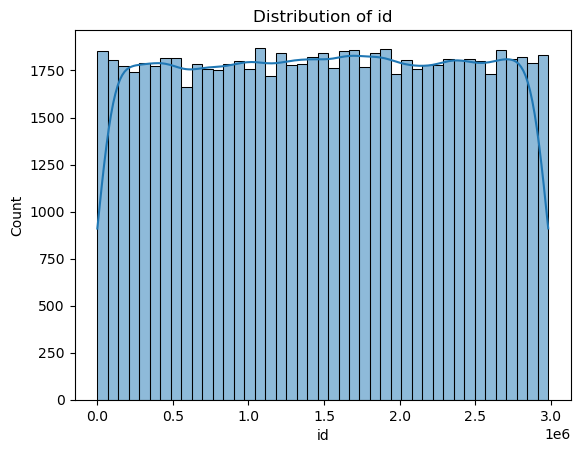


Column: parcelid


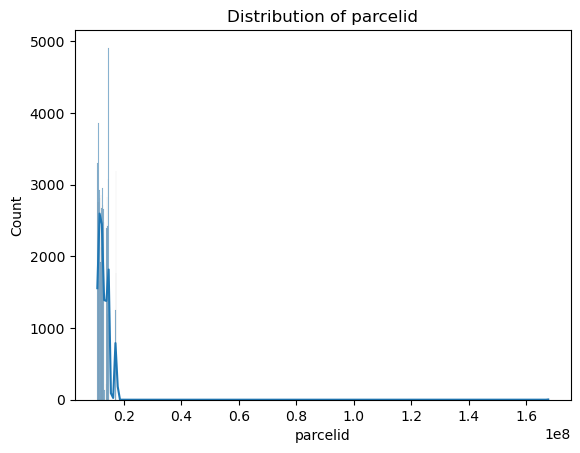


Column: bathroomcnt


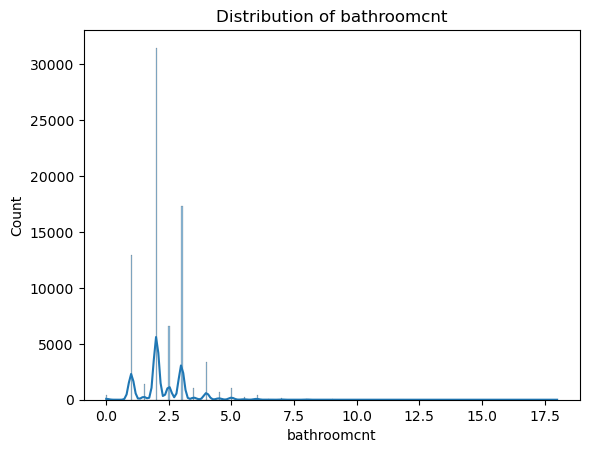


Column: bedroomcnt


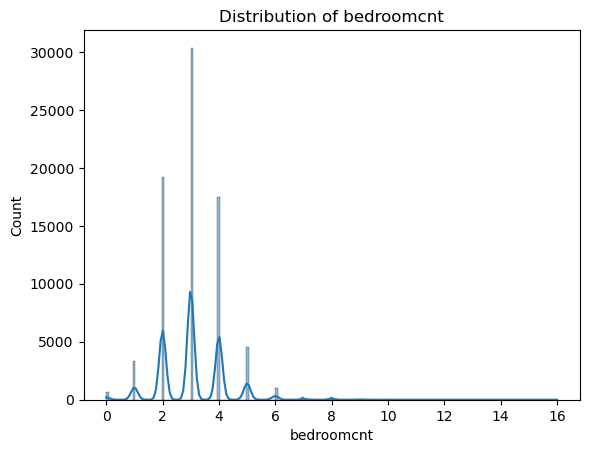


Column: buildingqualitytypeid


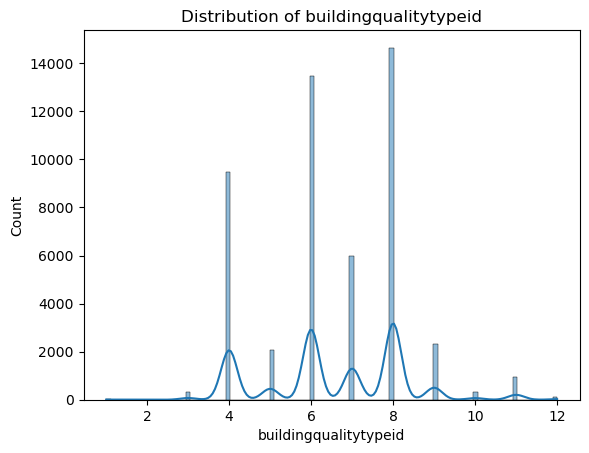


Column: calculatedbathnbr


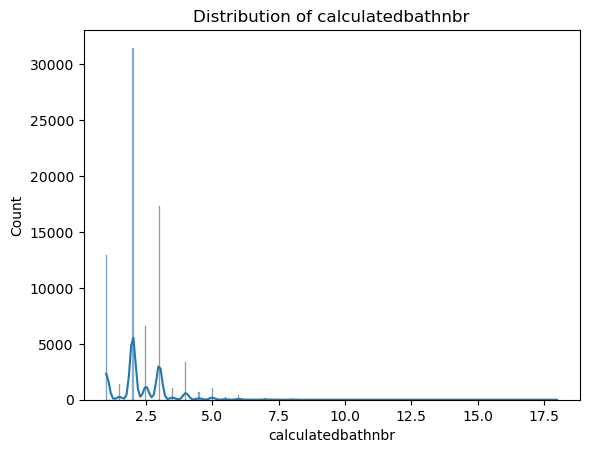


Column: calculatedfinishedsquarefeet


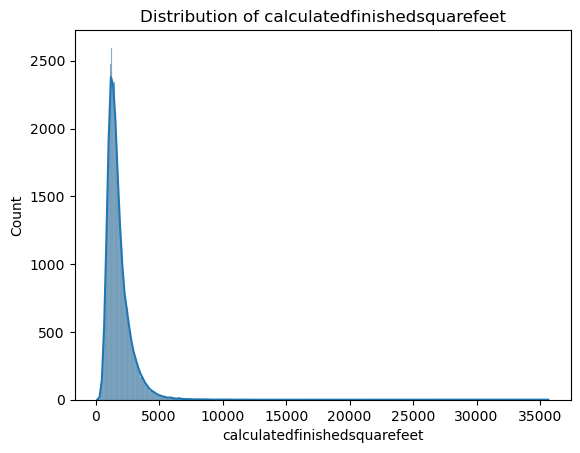


Column: finishedsquarefeet12


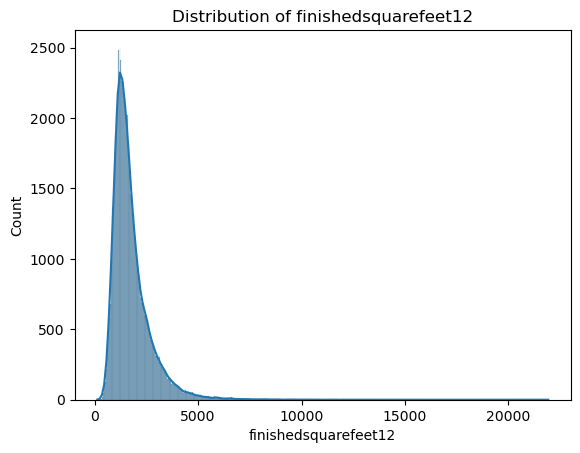


Column: fips


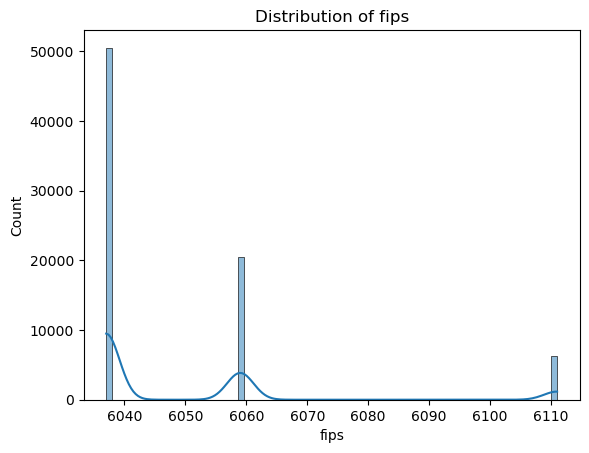


Column: fullbathcnt


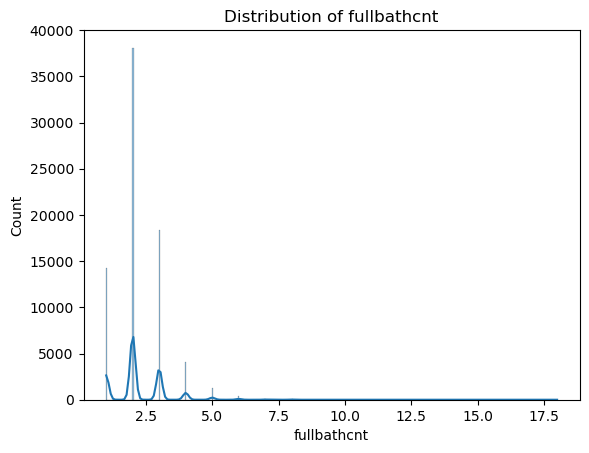


Column: heatingorsystemtypeid


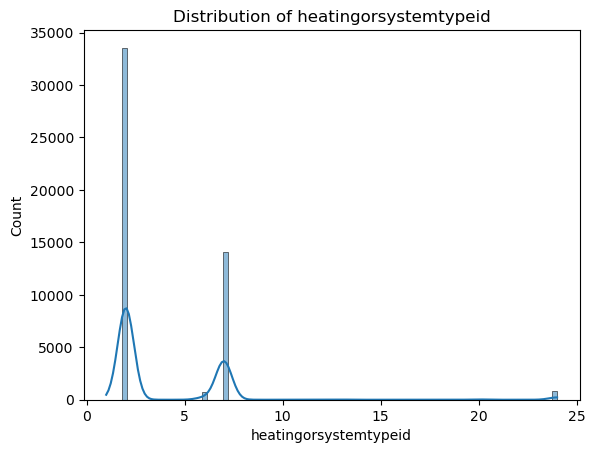


Column: latitude


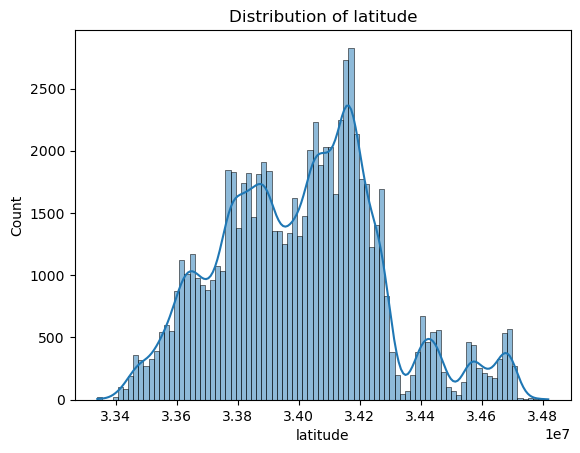


Column: longitude


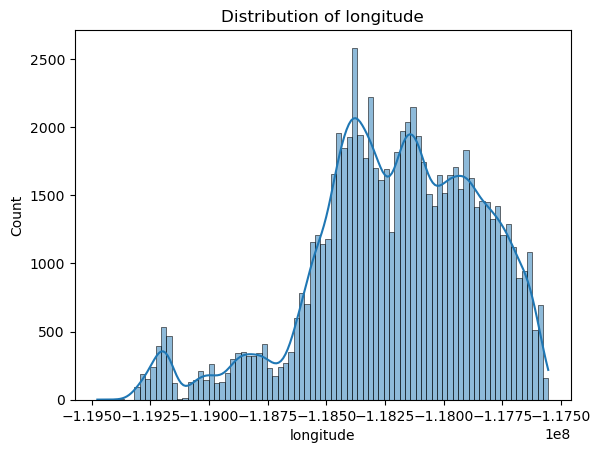


Column: lotsizesquarefeet


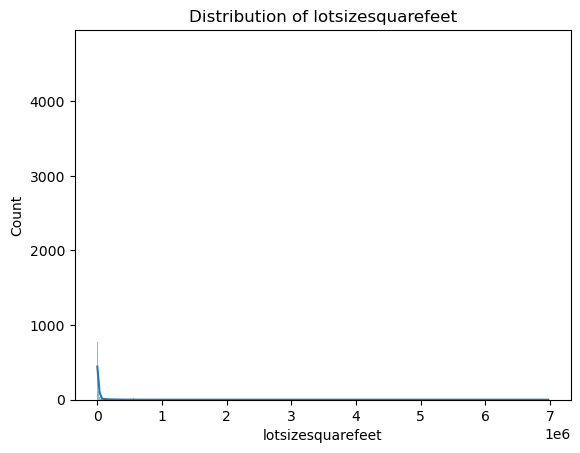


Column: propertycountylandusecode

Column: propertylandusetypeid


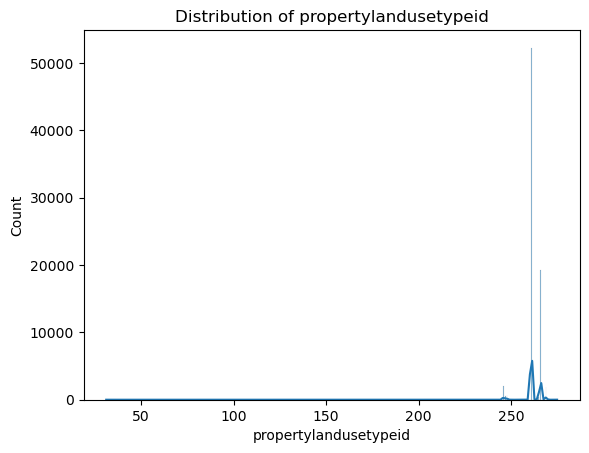


Column: propertyzoningdesc

Column: rawcensustractandblock


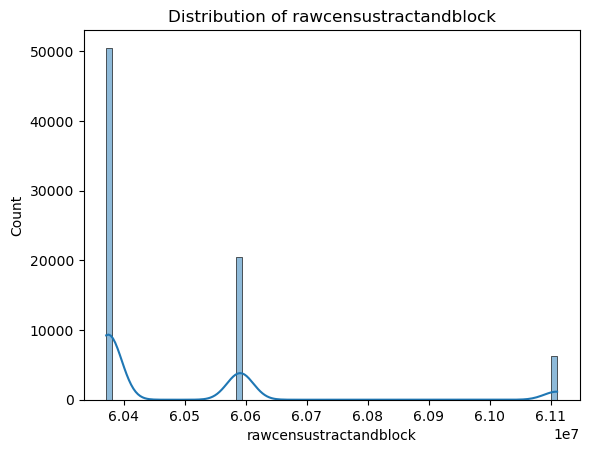


Column: regionidcity


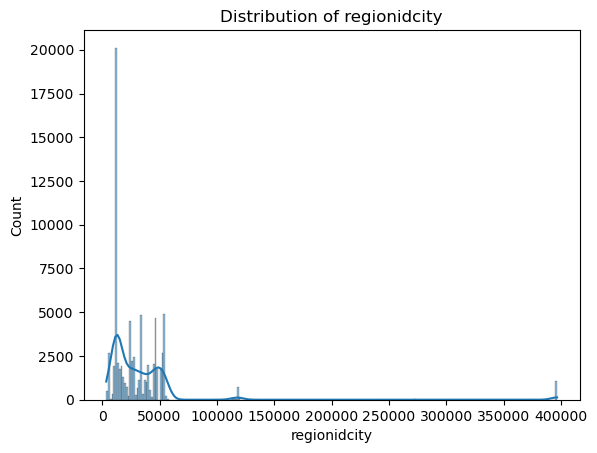


Column: regionidcounty


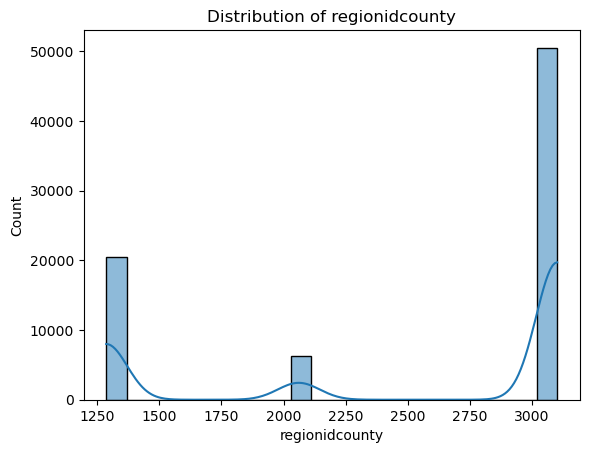


Column: regionidzip


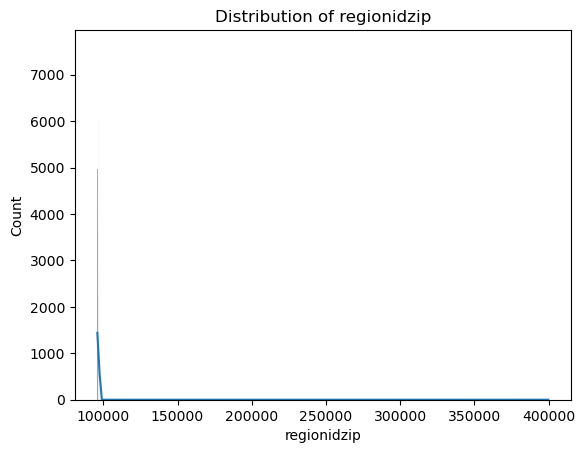


Column: roomcnt


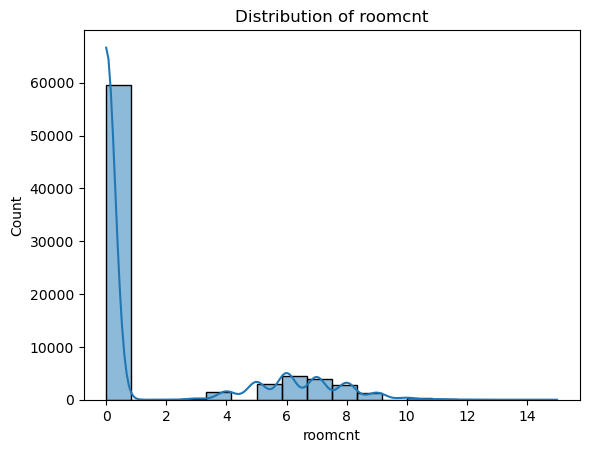


Column: unitcnt


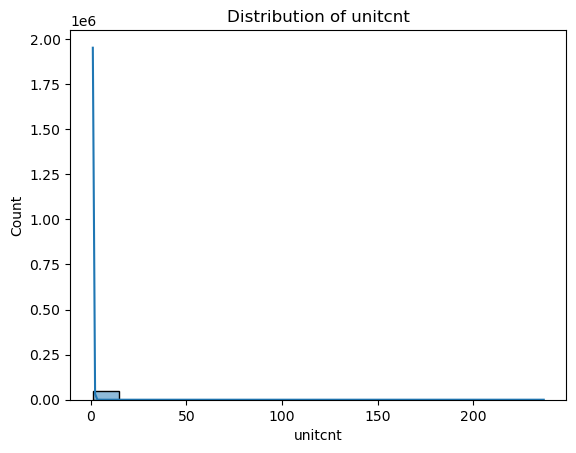


Column: yearbuilt


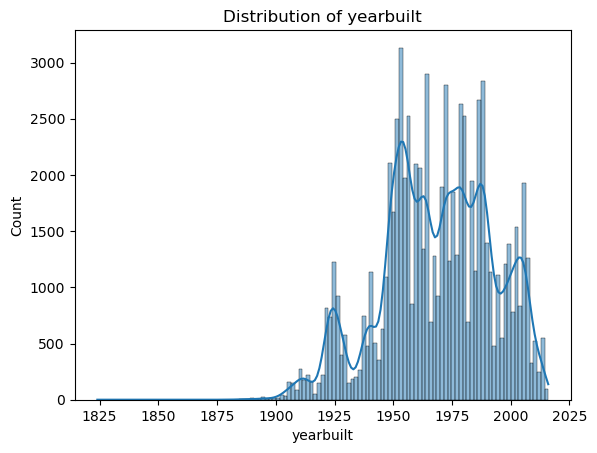


Column: structuretaxvaluedollarcnt


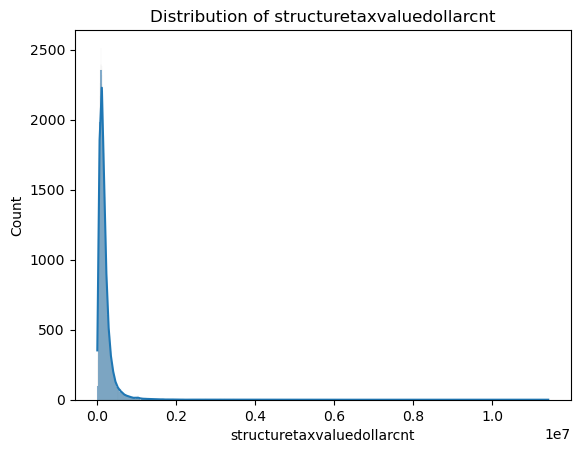


Column: taxvaluedollarcnt


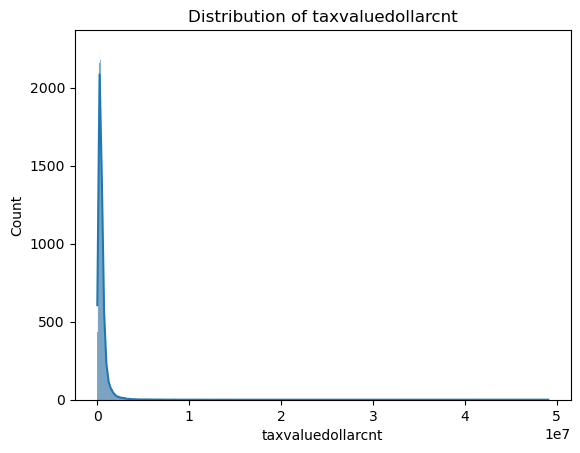


Column: assessmentyear


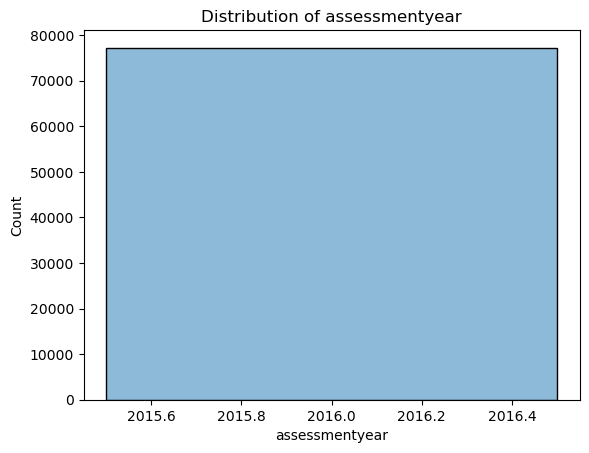


Column: landtaxvaluedollarcnt


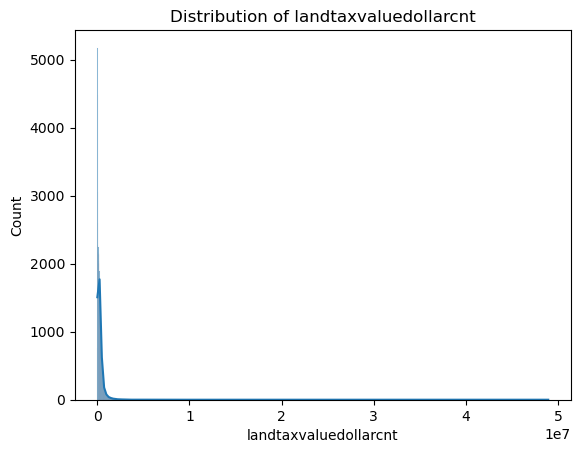


Column: taxamount


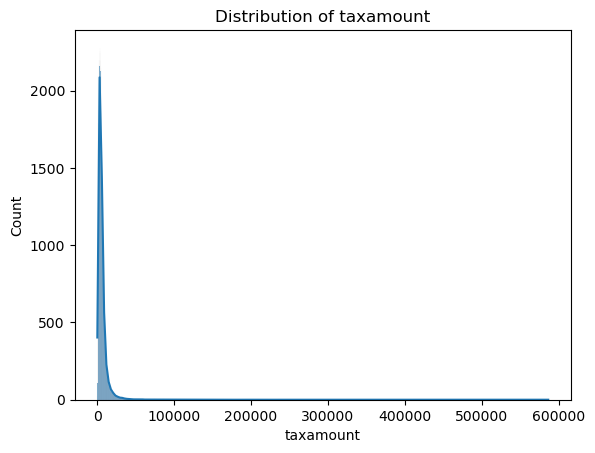


Column: censustractandblock


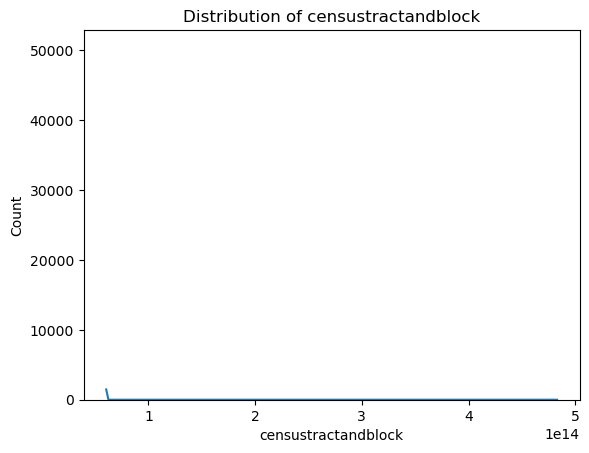


Column: logerror


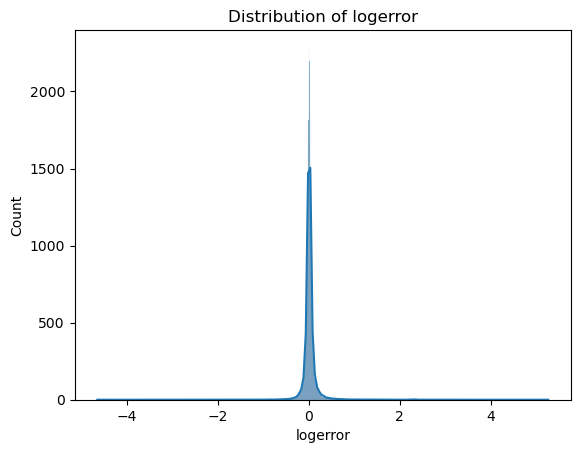


Column: transactiondate

Column: heatingorsystemdesc

Column: propertylandusedesc


,num_rows_missing,pct_rows_missing,count,count_nulls,pct_nulls,mean,std,min,25%,50%,75%,max,unique,top,freq,dtype,distribution_type,skewness,skew_type,data_type,num_outliers,variable_type
id,0.000000,0.000000,77226.000000,0,0.000000,1495110.592003,860980.720184,349.000000,751774.750000,1497655.000000,2241053.250000,2982274.000000,nan,nan,nan,int64,Non-normal,-0.006914,Left,Continuous,0.000000,numerical
parcelid,0.000000,0.000000,77226.000000,0,0.000000,12996726.026105,3301016.025203,10711855.000000,11537461.750000,12529553.000000,14209782.000000,167688532.000000,nan,nan,nan,int64,Non-normal,33.236869,Right,Continuous,27.000000,numerical
bathroomcnt,0.000000,0.000000,77226.000000,0,0.000000,2.303725,0.992339,0.000000,2.000000,2.000000,3.000000,18.000000,nan,nan,nan,float64,Non-normal,1.319431,Right,Discrete,2427.000000,numerical
bedroomcnt,0.000000,0.000000,77226.000000,0,0.000000,3.059591,1.132033,0.000000,2.000000,3.000000,4.000000,16.000000,nan,nan,nan,float64,Non-normal,0.794768,Right,Discrete,379.000000,numerical
buildingqualitytypeid,27554.000000,35.679693,49672.000000,27554,35.679693,6.534587,1.721953,1.000000,6.000000,6.000000,8.000000,12.000000,nan,nan,nan,float64,Non-normal,0.048163,Right,Discrete,151.000000,numerical
calculatedbathnbr,454.000000,0.587885,76772.000000,454,0.587885,2.316867,0.979755,1.000000,2.000000,2.000000,3.000000,18.000000,nan,nan,nan,float64,Non-normal,1.412550,Right,Discrete,1988.000000,numerical
calculatedfinishedsquarefeet,41.000000,0.053091,77185.000000,41,0.053091,1785.219939,954.049286,128.000000,1182.000000,1543.000000,2113.000000,35640.000000,nan,nan,nan,float64,Non-normal,3.297083,Right,Continuous,3994.000000,numerical
finishedsquarefeet12,3477.000000,4.502370,73749.000000,3477,4.502370,1760.522543,934.024340,128.000000,1172.000000,1523.000000,2076.000000,21929.000000,nan,nan,nan,float64,Non-normal,2.869875,Right,Continuous,3854.000000,numerical
fips,0.000000,0.000000,77226.000000,0,0.000000,6048.795587,20.740104,6037.000000,6037.000000,6037.000000,6059.000000,6111.000000,nan,nan,nan,float64,Non-normal,2.083257,Right,Discrete,6217.000000,ordinal
fullbathcnt,454.000000,0.587885,76772.000000,454,0.587885,2.250482,0.966552,1.000000,2.000000,2.000000,3.000000,18.000000,nan,nan,nan,float64,Non-normal,1.474035,Right,Discrete,1966.000000,numerical


In [15]:
wrangle.custom_describe(df)